# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных,

    В качестве набора данных мы будем использовать набор данных для классификации ABC-XYZ складских запасов https://www.kaggle.com/datasets/shahriarkabir/abc-xyz-inventory-classification-dataset?resource=download
    
    Данный набор данных помогает специалистам по цепочке поставок, аналитикам данных классифицировать по ABC-XYZ — критически важную технику управления запасами. Он моделирует реальные сценарии для оптимизации объемов запасов, снижения затрат и повышения уровня обслуживания посредством принятия решений на основе данных.
    CSV-файл содержит синтетический набор данных инвентаризации с 1000 уникальных элементов в пяти категориях. Каждый элемент включает:
    Ежемесячные данные о спросе (январь-декабрь)
    Общее количество проданных за год единиц
    Цена за единицу
    Общая стоимость продаж
    Возможности для выполнения классификации ABC (на основе ценности) и XYZ (изменчивости спроса)
    
    Датасет содержит следующие колонки: 
    - Item_ID - уникальный идентификатор товара
    - Item_Name - название товара
    - Category - категория
    - Jan_Demand - продажи в январе
    ...
    - Dec_Demand - продажи в декабре
    - Total_Annual_Units - общее количество проданных единиц за год
    - Price_Per_Unit - цена за единицу
    - Total_Sales_Value - общая стоимость продаж

In [1]:
import micropip
await micropip.install('seaborn')  # Установка seaborn

In [2]:
# импорт библиотек

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# Загрузка данных
    Загрузим файлы датасета в помощью библиотеки Pandas. Разделитель в данном датасете - ","

In [3]:
data = pd.read_csv('data/abc_xyz_dataset.csv', sep=",")

# 2) Основные характеристики датасета

In [4]:
# выведем первые 20 строк
data.head(20)

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330
5,ITM_006,Special Strategy,Grocery,1786,2201,2197,2234,1948,2085,2326,1960,2299,2494,1813,2017,25360,2,50720
6,ITM_007,Memory Expert,Apparel,808,531,542,851,955,782,483,859,464,454,967,468,8164,2,16328
7,ITM_008,About No,Toys,328,294,298,297,306,294,272,274,306,286,291,297,3543,2,7086
8,ITM_009,After Finally,Grocery,1335,1601,1238,1134,1442,1551,1301,1128,1167,1353,1645,1480,16375,10,163750
9,ITM_010,Require Goal,Electronics,82,83,74,72,83,108,80,88,76,93,85,91,1015,2,2030


In [5]:
# Размер датасета - 1000 строк, 18 колонок
data.shape

(1000, 18)

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1000


In [7]:
# Список колонок
data.columns

Index(['Item_ID', 'Item_Name', 'Category', 'Jan_Demand', 'Feb_Demand',
       'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand', 'Jul_Demand',
       'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand',
       'Total_Annual_Units', 'Price_Per_Unit', 'Total_Sales_Value'],
      dtype='object')

In [8]:
# Список колонок с типами данных
data.dtypes

Item_ID               object
Item_Name             object
Category              object
Jan_Demand             int64
Feb_Demand             int64
Mar_Demand             int64
Apr_Demand             int64
May_Demand             int64
Jun_Demand             int64
Jul_Demand             int64
Aug_Demand             int64
Sep_Demand             int64
Oct_Demand             int64
Nov_Demand             int64
Dec_Demand             int64
Total_Annual_Units     int64
Price_Per_Unit         int64
Total_Sales_Value      int64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Item_ID - 0
Item_Name - 0
Category - 0
Jan_Demand - 0
Feb_Demand - 0
Mar_Demand - 0
Apr_Demand - 0
May_Demand - 0
Jun_Demand - 0
Jul_Demand - 0
Aug_Demand - 0
Sep_Demand - 0
Oct_Demand - 0
Nov_Demand - 0
Dec_Demand - 0
Total_Annual_Units - 0
Price_Per_Unit - 0
Total_Sales_Value - 0


In [10]:
# Основные статистические характеристки набора данных
data.describe()

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,1418.515000,1418.394000,1421.23900,1409.242000,1411.762000,1412.853000,1410.558000,1403.721000,1411.109,1411.700000,1413.422000,1419.38100,16961.896000,57.358000,1.072288e+06
std,1489.352997,1488.076126,1496.49987,1489.280958,1488.620593,1490.568779,1497.772702,1484.283184,1482.689,1484.762652,1482.821287,1496.14098,17788.477345,155.110913,4.087477e+06
min,24.000000,7.000000,2.00000,8.000000,9.000000,15.000000,6.000000,2.000000,2.000,11.000000,9.000000,4.00000,581.000000,2.000000,1.228000e+03
25%,282.750000,279.000000,278.00000,278.000000,280.000000,277.750000,267.000000,283.000000,282.000,277.000000,275.750000,283.00000,3369.500000,2.000000,1.661900e+04
50%,539.500000,558.000000,591.50000,558.000000,541.500000,598.000000,555.000000,550.500000,547.000,591.000000,608.000000,562.00000,6737.500000,10.000000,7.283600e+04
75%,2478.500000,2529.250000,2515.75000,2427.000000,2461.250000,2451.500000,2547.500000,2407.750000,2472.750,2492.500000,2406.250000,2422.00000,29874.500000,50.000000,3.782425e+05
max,5276.000000,5171.000000,5271.00000,5186.000000,5384.000000,5462.000000,5504.000000,5219.000000,5240.000,5189.000000,5255.000000,5180.00000,59967.000000,1000.000000,5.946200e+07


# 3) Визуальное исследование датасета

    Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

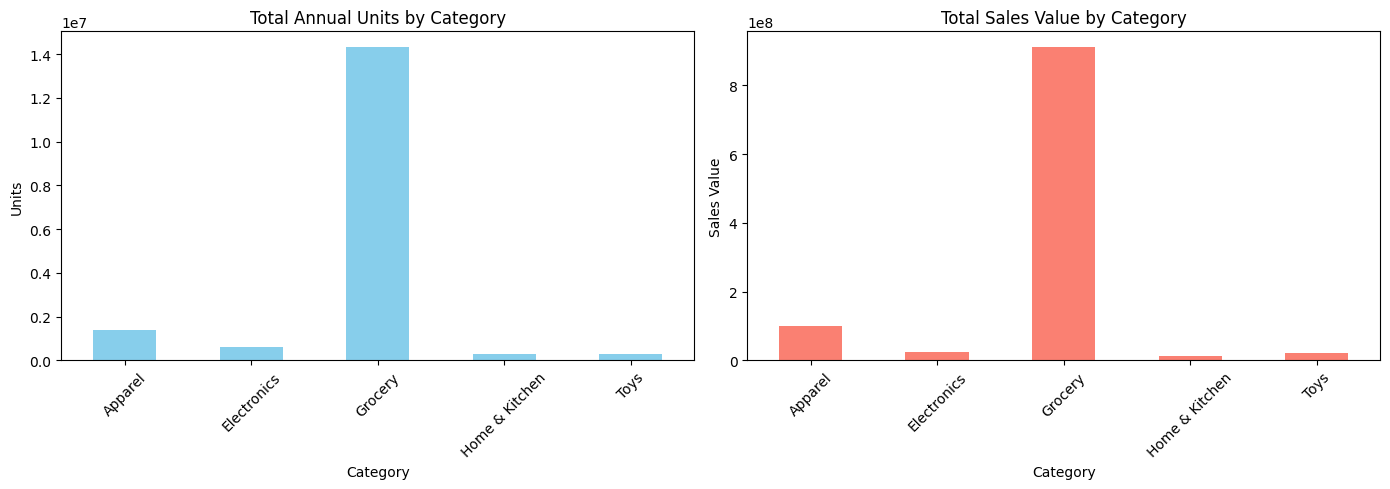

In [11]:
grouped_category_total_annual_units = data.groupby('Category')['Total_Annual_Units'].sum()
grouped_category_total_sales_value = data.groupby('Category')['Total_Sales_Value'].sum()

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма для Total_Annual_Units
grouped_category_total_annual_units.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Total Annual Units by Category')
ax1.set_ylabel('Units')
ax1.tick_params(axis='x', rotation=45)

# Гистограмма для Total_Sales_Value
grouped_category_total_sales_value.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Total Sales Value by Category')
ax2.set_ylabel('Sales Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

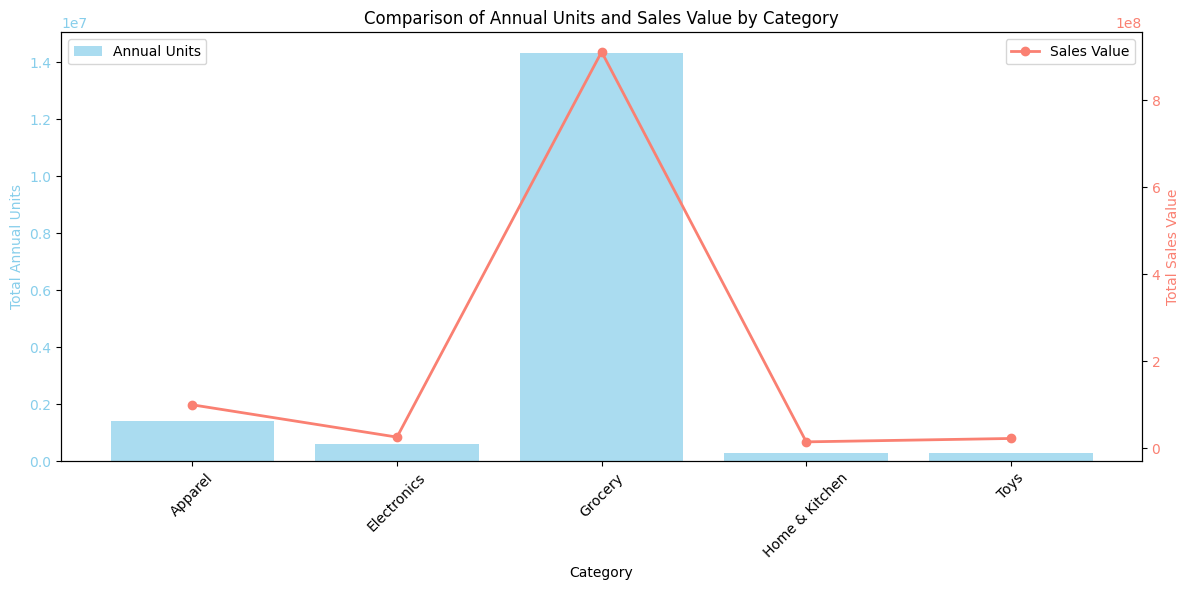

In [12]:
# Создаем фигуру и основную ось
fig, ax1 = plt.subplots(figsize=(12, 6))

# Гистограмма для Total_Annual_Units
bars = ax1.bar(grouped_category_total_annual_units.index, 
               grouped_category_total_annual_units, 
               color='skyblue', alpha=0.7)
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Annual Units', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=45)

# Создаем вторую ось Y
ax2 = ax1.twinx()

# Линейный график для Total_Sales_Value
line = ax2.plot(grouped_category_total_sales_value.index, 
                grouped_category_total_sales_value, 
                color='salmon', marker='o', linewidth=2)
ax2.set_ylabel('Total Sales Value', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Добавляем заголовок
plt.title('Comparison of Annual Units and Sales Value by Category')

# Добавляем легенду
ax1.legend(['Annual Units'], loc='upper left')
ax2.legend(['Sales Value'], loc='upper right')

# Автоматическая подгонка layout
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

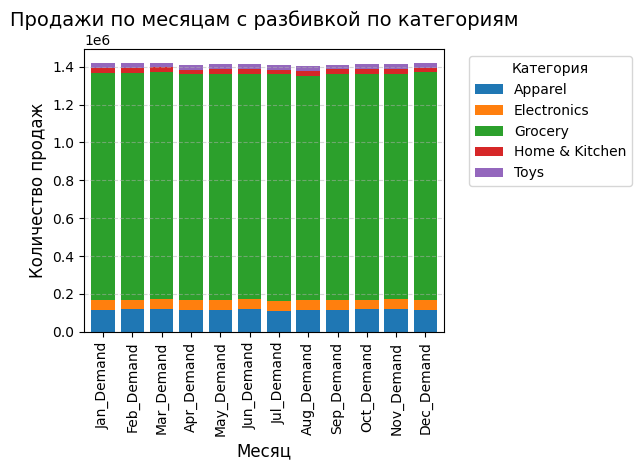

In [13]:
# 1. Группируем данные по категориям и суммируем продажи по месяцам
category_monthly = data.groupby('Category')[['Jan_Demand', 'Feb_Demand', 'Mar_Demand',
                                           'Apr_Demand', 'May_Demand', 'Jun_Demand',
                                           'Jul_Demand', 'Aug_Demand', 'Sep_Demand',
                                           'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].sum()

# 2. Транспонируем DataFrame
category_monthly_T = category_monthly.T

# 4. Строим stacked гистограмму
plt.figure(figsize=(12, 6))
category_monthly_T.plot(kind='bar', stacked=True, width=0.8)

# 5. Настраиваем график
plt.title('Продажи по месяцам с разбивкой по категориям', fontsize=14)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

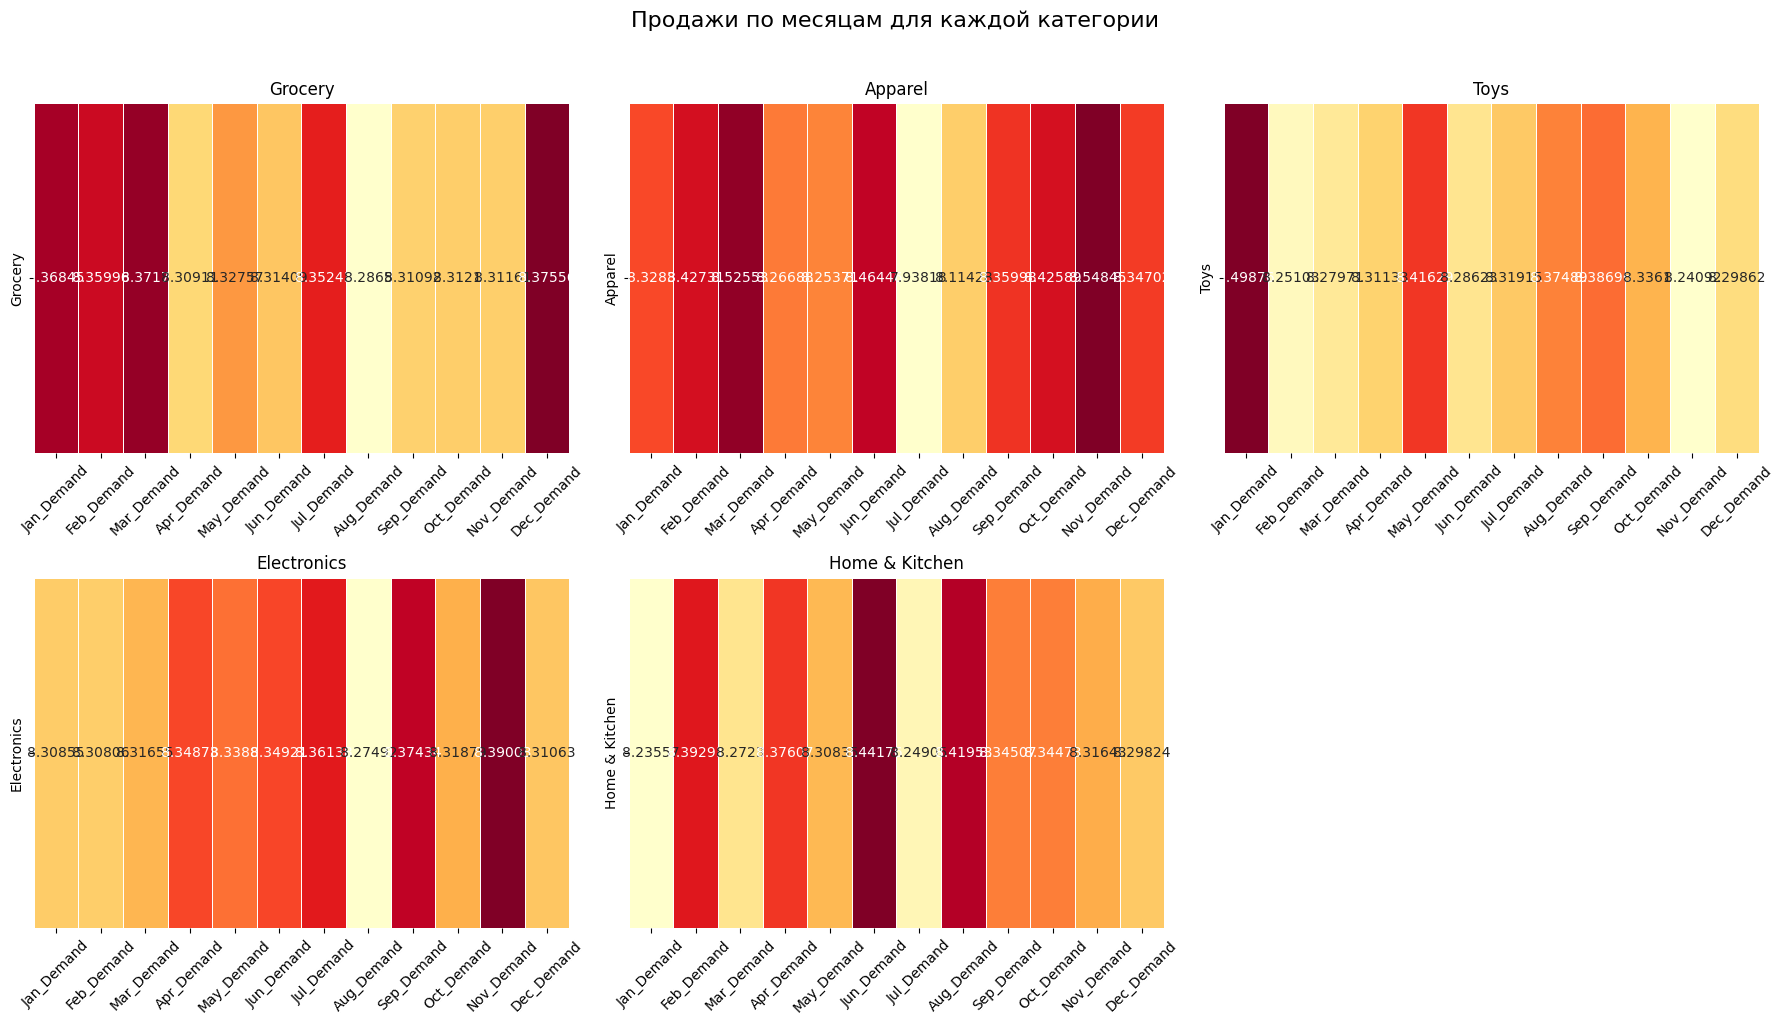

In [14]:
# Получаем список всех категорий
categories = data['Category'].unique()

# Определяем размер сетки
n_cols = 3  # Количество столбцов
n_rows = int(np.ceil(len(categories) / n_cols))  # Количество строк

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
fig.suptitle('Продажи по месяцам для каждой категории', y=1.02, fontsize=16)

# Выравниваем axes в плоский массив
axes = axes.flatten()

# Проходим по всем категориям
for i, category in enumerate(categories):
    # Фильтруем данные по категории
    category_data = data[data['Category'] == category]
    
    # Суммируем продажи по месяцам
    monthly_sales = category_data[['Jan_Demand', 'Feb_Demand', 'Mar_Demand',
                                 'Apr_Demand', 'May_Demand', 'Jun_Demand',
                                 'Jul_Demand', 'Aug_Demand', 'Sep_Demand',
                                 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']].sum()
    
    # Преобразуем в DataFrame для heatmap
    heatmap_data = pd.DataFrame(monthly_sales).T
    heatmap_data.index = [category]  # Название категории как индекс
    heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100  # Проценты
    # Строим тепловую карту
    sns.heatmap(heatmap_data, 
                ax=axes[i],
                cmap='YlOrRd',
                annot=True,
                fmt='g',
                cbar=False,
                linewidths=.5)
    
    # Настраиваем подграфик
    axes[i].set_title(category)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

# Скрываем пустые подграфики (если количество категорий не кратно n_cols)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Ящик с усами

<Axes: xlabel='May_Demand'>

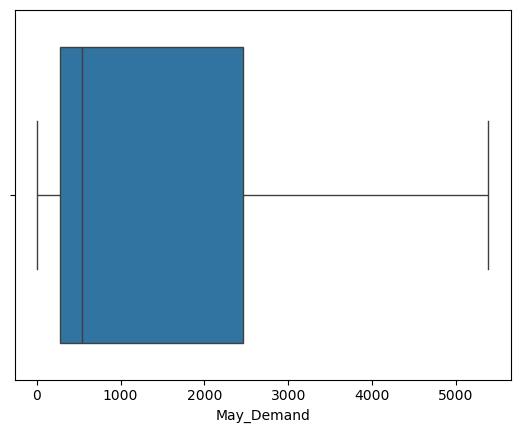

In [15]:
sns.boxplot(x=data['May_Demand'])

<Axes: xlabel='Price_Per_Unit'>

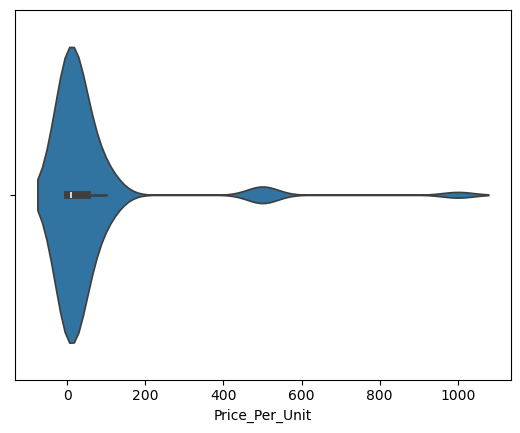

In [16]:
sns.violinplot(x=data['Price_Per_Unit'])

<Axes: xlabel='Jan_Demand'>

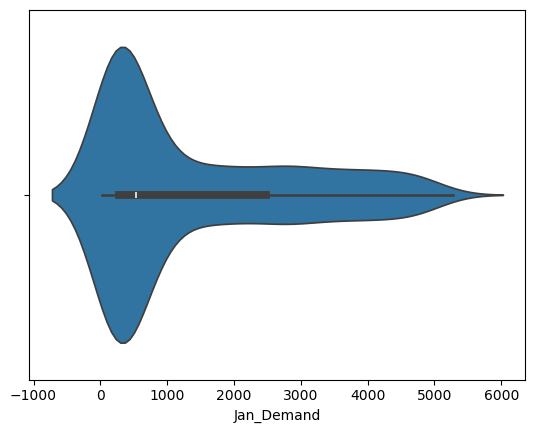

In [17]:
sns.violinplot(x=data['Jan_Demand'])

In [18]:
sum_sales = data['Total_Sales_Value'].sum()
category_monthly['Total_Sales_Value'] = data.groupby('Category')['Total_Sales_Value'].sum()
category_monthly['ABC'] = category_monthly['Total_Sales_Value'] / sum_sales
category_monthly.head()

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Sales_Value,ABC
Category,,,,,,,,,,,,,,
Apparel,117009,118400,119780,116146,115961,118922,111528,114002,117454,118380,120102,117272,99381360,0.092682
Electronics,51897,51894,51947,52148,52086,52151,52227,51687,52308,51961,52406,51910,25081150,0.023390
Grocery,1199093,1197877,1199559,1190590,1193236,1191304,1196798,1187350,1190849,1191018,1190949,1200111,911737236,0.850273
Home & Kitchen,24444,24911,24553,24861,24660,25056,24484,24990,24769,24768,24684,24630,14143006,0.013190
Toys,26072,25312,25400,25497,25819,25420,25521,25692,25729,25573,25281,25458,21945148,0.020466


In [19]:
category_monthly = category_monthly.drop(columns=['Total_Sales_Value'])
category_monthly.head()

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,ABC
Category,,,,,,,,,,,,,
Apparel,117009,118400,119780,116146,115961,118922,111528,114002,117454,118380,120102,117272,0.092682
Electronics,51897,51894,51947,52148,52086,52151,52227,51687,52308,51961,52406,51910,0.023390
Grocery,1199093,1197877,1199559,1190590,1193236,1191304,1196798,1187350,1190849,1191018,1190949,1200111,0.850273
Home & Kitchen,24444,24911,24553,24861,24660,25056,24484,24990,24769,24768,24684,24630,0.013190
Toys,26072,25312,25400,25497,25819,25420,25521,25692,25729,25573,25281,25458,0.020466


In [22]:
category_monthly.corr()

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,ABC
Jan_Demand,1.000000,0.999999,0.999997,1.000000,1.000000,0.999997,0.999990,0.999998,0.999999,0.999998,0.999994,1.000000,0.999733
Feb_Demand,0.999999,1.000000,0.999999,0.999999,0.999998,1.000000,0.999983,0.999995,1.000000,1.000000,0.999998,0.999999,0.999748
Mar_Demand,0.999997,0.999999,1.000000,0.999996,0.999995,1.000000,0.999975,0.999990,0.999999,1.000000,1.000000,0.999998,0.999766
Apr_Demand,1.000000,0.999999,0.999996,1.000000,1.000000,0.999997,0.999991,0.999999,0.999999,0.999998,0.999994,1.000000,0.999719
May_Demand,1.000000,0.999998,0.999995,1.000000,1.000000,0.999996,0.999992,0.999999,0.999999,0.999997,0.999993,1.000000,0.999717
Jun_Demand,0.999997,1.000000,1.000000,0.999997,0.999996,1.000000,0.999978,0.999992,0.999999,1.000000,0.999999,0.999998,0.999756
Jul_Demand,0.999990,0.999983,0.999975,0.999991,0.999992,0.999978,1.000000,0.999996,0.999986,0.999981,0.999970,0.999988,0.999634
Aug_Demand,0.999998,0.999995,0.999990,0.999999,0.999999,0.999992,0.999996,1.000000,0.999996,0.999994,0.999987,0.999998,0.999695
Sep_Demand,0.999999,1.000000,0.999999,0.999999,0.999999,0.999999,0.999986,0.999996,1.000000,1.000000,0.999997,1.000000,0.999737
Oct_Demand,0.999998,1.000000,1.000000,0.999998,0.999997,1.000000,0.999981,0.999994,1.000000,1.000000,0.999999,0.999999,0.999754


In [23]:
category_monthly.corr(method='pearson')

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,ABC
Jan_Demand,1.000000,0.999999,0.999997,1.000000,1.000000,0.999997,0.999990,0.999998,0.999999,0.999998,0.999994,1.000000,0.999733
Feb_Demand,0.999999,1.000000,0.999999,0.999999,0.999998,1.000000,0.999983,0.999995,1.000000,1.000000,0.999998,0.999999,0.999748
Mar_Demand,0.999997,0.999999,1.000000,0.999996,0.999995,1.000000,0.999975,0.999990,0.999999,1.000000,1.000000,0.999998,0.999766
Apr_Demand,1.000000,0.999999,0.999996,1.000000,1.000000,0.999997,0.999991,0.999999,0.999999,0.999998,0.999994,1.000000,0.999719
May_Demand,1.000000,0.999998,0.999995,1.000000,1.000000,0.999996,0.999992,0.999999,0.999999,0.999997,0.999993,1.000000,0.999717
Jun_Demand,0.999997,1.000000,1.000000,0.999997,0.999996,1.000000,0.999978,0.999992,0.999999,1.000000,0.999999,0.999998,0.999756
Jul_Demand,0.999990,0.999983,0.999975,0.999991,0.999992,0.999978,1.000000,0.999996,0.999986,0.999981,0.999970,0.999988,0.999634
Aug_Demand,0.999998,0.999995,0.999990,0.999999,0.999999,0.999992,0.999996,1.000000,0.999996,0.999994,0.999987,0.999998,0.999695
Sep_Demand,0.999999,1.000000,0.999999,0.999999,0.999999,0.999999,0.999986,0.999996,1.000000,1.000000,0.999997,1.000000,0.999737
Oct_Demand,0.999998,1.000000,1.000000,0.999998,0.999997,1.000000,0.999981,0.999994,1.000000,1.000000,0.999999,0.999999,0.999754


In [ ]:
monthly_sales.corr(method='spearman')

<Axes: >

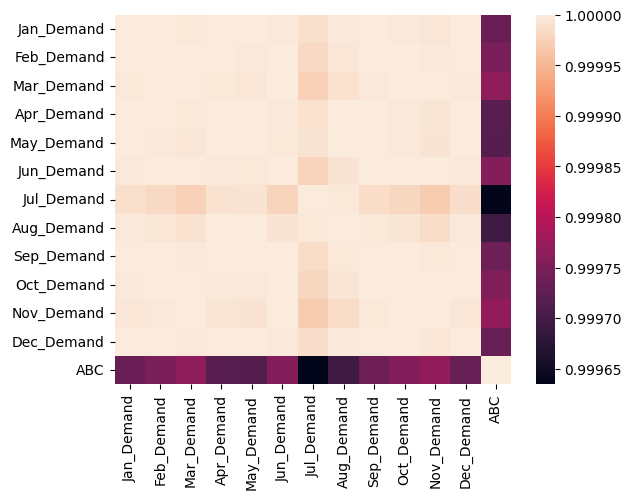

In [24]:
sns.heatmap(category_monthly.corr())